In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# 先篩選數值型的欄位
print('dtypes: ', app_train.dtypes)
dtype_select = ['float64', 'int64']
# dtype_select = [np.float64, np.int64]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print('numeric_columns: ', numeric_columns)

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %s" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train.boxplot(col)
#     plt.boxplot(app_train[col].values, labels=[col])
    plt.title(col)
    plt.show()
    
    plt.hist(app_train[col])
    plt.title(col)
    plt.show()

dtypes:  SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLA

In [30]:
df = DataFrame(app_train)
print('rows: ', df.shape[0])
print('columns: ', df.shape[1])

rows:  307511
columns:  122


In [31]:
path = os.path.join(dir_data, 'HomeCredit_columns_description.csv')
# print(path)
# csv = pd.read_csv(path, encoding='utf-8')
csv = pd.read_csv(path, encoding="ISO-8859-1")
description = DataFrame(csv)
description

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [32]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [34]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [35]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

min:  25650.0
max:  117000000.0


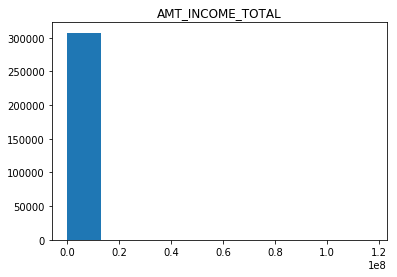

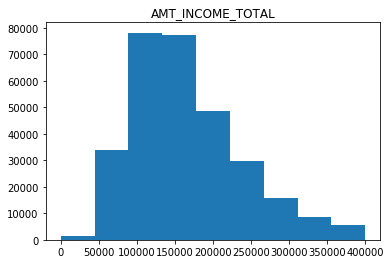

In [36]:
# 直方圖
t = 'AMT_INCOME_TOTAL'
x = df[t]
print('min: ', x.min())
print('max: ', x.max())

plt.hist(x, bins = np.linspace(x.min(), x.max(), 10)) 
plt.title(t) 
plt.show()

plt.hist(x, bins = np.linspace(0, 400000, 10))
plt.title(t) 
plt.show()

In [37]:
print(df.loc[df['AMT_INCOME_TOTAL'].idxmax(), 'DAYS_BIRTH']/-365)
print(df.loc[df['AMT_INCOME_TOTAL'].idxmax(), 'AMT_INCOME_TOTAL'])

print(df.loc[df['AMT_INCOME_TOTAL'].idxmin(), 'DAYS_BIRTH']/-365)
print(df.loc[df['AMT_INCOME_TOTAL'].idxmin(), 'AMT_INCOME_TOTAL'])

34.56164383561644
117000000.0
48.8027397260274
25650.0


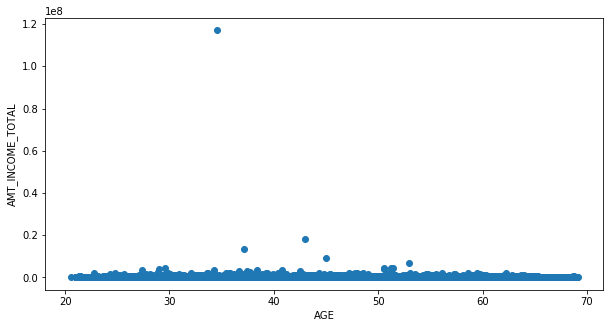

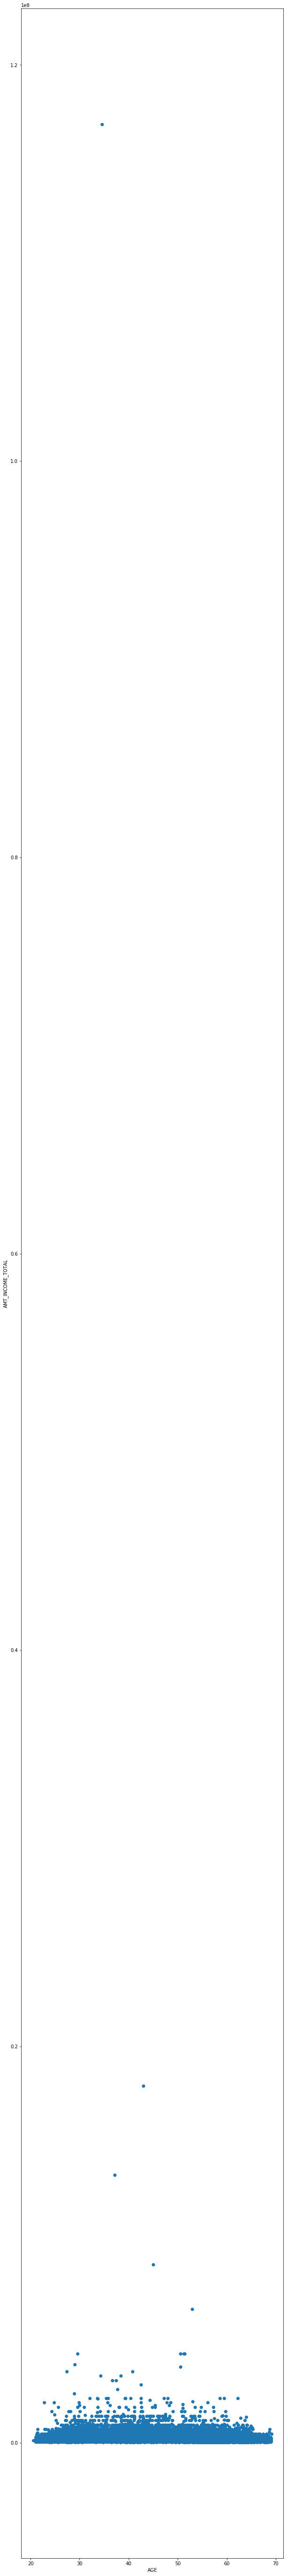

In [38]:
t_x = 'AGE'
t_y = 'AMT_INCOME_TOTAL'

x = df['DAYS_BIRTH']/-365
y = df['AMT_INCOME_TOTAL']

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xlabel(t_x)
plt.ylabel(t_y)
plt.show()

plt.figure(figsize=(10, 100))
plt.scatter(x, y)
plt.xlabel(t_x)
plt.ylabel(t_y)
plt.show()

In [39]:
# 極端值 Outliers
# 最大值離平均與中位數很遠

In [40]:
# One Hot
sub_train = df['WEEKDAY_APPR_PROCESS_START']
print(sub_train.shape)
print(sub_train.head())
sub_train = pd.get_dummies(sub_train)
print(sub_train.head())

(307511,)
0    WEDNESDAY
1       MONDAY
2       MONDAY
3    WEDNESDAY
4     THURSDAY
Name: WEEKDAY_APPR_PROCESS_START, dtype: object
   FRIDAY  MONDAY  SATURDAY  SUNDAY  THURSDAY  TUESDAY  WEDNESDAY
0       0       0         0       0         0        0          1
1       0       1         0       0         0        0          0
2       0       1         0       0         0        0          0
3       0       0         0       0         0        0          1
4       0       0         0       0         1        0          0


In [41]:
# 缺失值 NAN
print(app_train['AMT_ANNUITY'].isnull().any())

# 如果欄位中有 NA, describe 會有問題
app_train['AMT_ANNUITY'].describe()

# 計算 AMT_ANNUITY 的 q0 - q100
# Ignore NA, 計算五值
q0_q100 = np.linspace(0, 100, 101)
q_all = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in q0_q100]
print(pd.DataFrame({'q': list(range(101)), 'value': q_all}))

True
       q      value
0      0    1615.50
1      1    6182.91
2      2    6750.00
3      3    7875.00
4      4    8703.00
5      5    9000.00
6      6    9000.00
7      7    9553.50
8      8   10125.00
9      9   10503.00
10    10   11074.50
11    11   11430.00
12    12   11970.00
13    13   12375.00
14    14   12838.50
15    15   13302.00
16    16   13500.00
17    17   13500.00
18    18   13896.00
19    19   14350.50
20    20   14701.50
21    21   15124.50
22    22   15583.50
23    23   15970.50
24    24   16209.00
25    25   16524.00
26    26   16852.50
27    27   17109.00
28    28   17487.00
29    29   17806.50
..   ...        ...
71    71   32458.50
72    72   32895.00
73    73   33376.50
74    74   33984.00
75    75   34596.00
76    76   35345.16
77    77   35806.50
78    78   36328.50
79    79   36747.00
80    80   37516.50
81    81   37948.50
82    82   38556.00
83    83   39456.00
84    84   40135.50
85    85   40806.00
86    86   41845.50
87    87   42790.50
88    88   4373

In [42]:
# 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))
app_train[app_train['AMT_ANNUITY'].isnull()] = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)
print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


In [43]:
# 將 NAs 以 眾數 填補
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
from scipy.stats import mode

value_most = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
ModeResult(mode=array([450000.]), count=array([26019]))
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


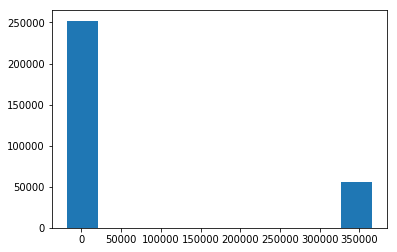

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

In [209]:
# 異常值
app_train['AMT_ANNUITY'].describe()

t = 'DAYS_EMPLOYED'
print(app_train[t].describe())
plt.hist(app_train[t].values)
plt.show()
print(app_train[t].value_counts())

False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


/Users/ianfan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ianfan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


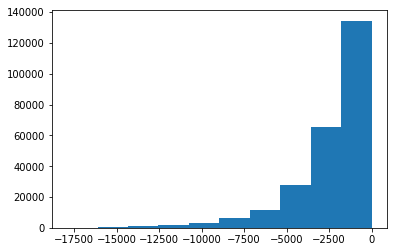

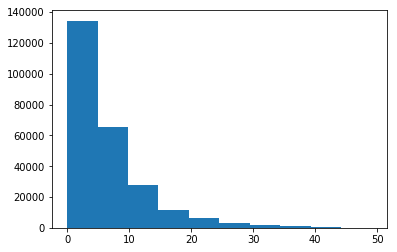

In [210]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())

# # 這邊我們用 nan 將異常值取代
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plt.hist(app_train[t])
plt.show()

plt.hist(app_train[t]/-365)
plt.show()

In [212]:
# print(app_train['AMT_INCOME_TOTAL'].dtypes)
# dtype_select = [np.float64]
# print(app_train.dtypes.isin(dtype_select))
# numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
# print('numeric_columns: ', numeric_columns)

# # 再把只有 2 值 (通常是 0,1) 的欄位去掉
# numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
# print("Numbers of remain columns %s" % len(numeric_columns))

# # 檢視這些欄位的數值範圍
# for col in numeric_columns:
#     plt.hist(app_train[col])
#     plt.title(col)
#     plt.show()

float64
SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                   False
AMT_GOODS_PRICE               False
NAME_TYPE_SUITE               False
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
DAYS_BIRTH                    False
DAYS_EMPLOYED                 False
DAYS_REGISTRATION             False
DAYS_ID_PUBLISH               False
OWN_CAR_AGE                   False
FLAG_MOBIL                    False
FLAG_EMP_PHONE                False
FLAG_WORK_PHONE               False
FLAG_CONT_MOBILE              False
FLAG_PHONE                    False
FLAG_EMAIL          

In [ ]:
# 標準化
Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    value = x.values
    print(value)
    x = 2 * ((( value - min(value) ) / ( max(value) - min(value))) - 0.5)
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()